##  Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction). Iremos utilizar a base traduzida para português fornecida pela ebac.
  
Nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (atraso maior ou igual a 90 dentro de um período de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio
Note que o objetivo aqui é que o modelo auxilie a instituição de crédito a avaliar se um cliente tem chance ser ser um "bom" ou "mau" pagador, iremos classificar como "mau" pagador, clientes com atrasos maior ou igual a 90 dias
- Objetivos da modelagem
O objetivo da modelagem será auxiliar na predição da inadimplencia do cliente

## Entendimento dos dados

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|


#### Importando os pacotes

lista de pacotes que iremos utilizar

In [76]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Carregando a base de dados

In [3]:
df = pd.read_csv('demo01 (1).csv')

Demonstração das linhas e colunas iniciais

In [8]:
print(f'{df.shape[0]} linhas e {df.shape[1]} colunas')
df.head()

16650 linhas e 16 colunas


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


### Análise dos dados

Irei realizar a análise das colunas e suas distribuições, verificar linhas com dados faltantes para no próximo passo realizar o tratamento dos dados

#### df.info()

Com este comando é possível observar o tipo de cada coluna e o número de linhas com valores não nulo.

É possível observar que em todas colunas todos valores estão preenchidos, porém será necessário mudarmos as colunas de tipo String (object) em variáveis dummies

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

Irei realizar a análise de algumas colunas e também da variável target (mau)

#### Variável "mau"

In [10]:
df['mau'].value_counts()

mau
False    16260
True       390
Name: count, dtype: int64

<Axes: xlabel='mau'>

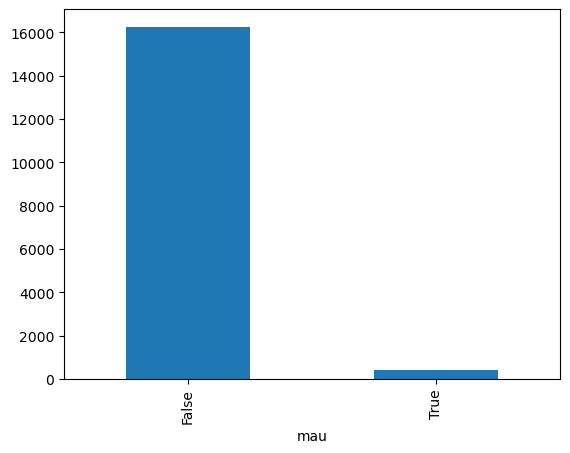

In [20]:
df['mau'].value_counts().plot.bar()

#### Variáveis de tipo object: "sexo", "posse_de_veiculo", "posse_de_imovel", "tipo_renda", "educacao", "estado_civil", "tipo_residencia"

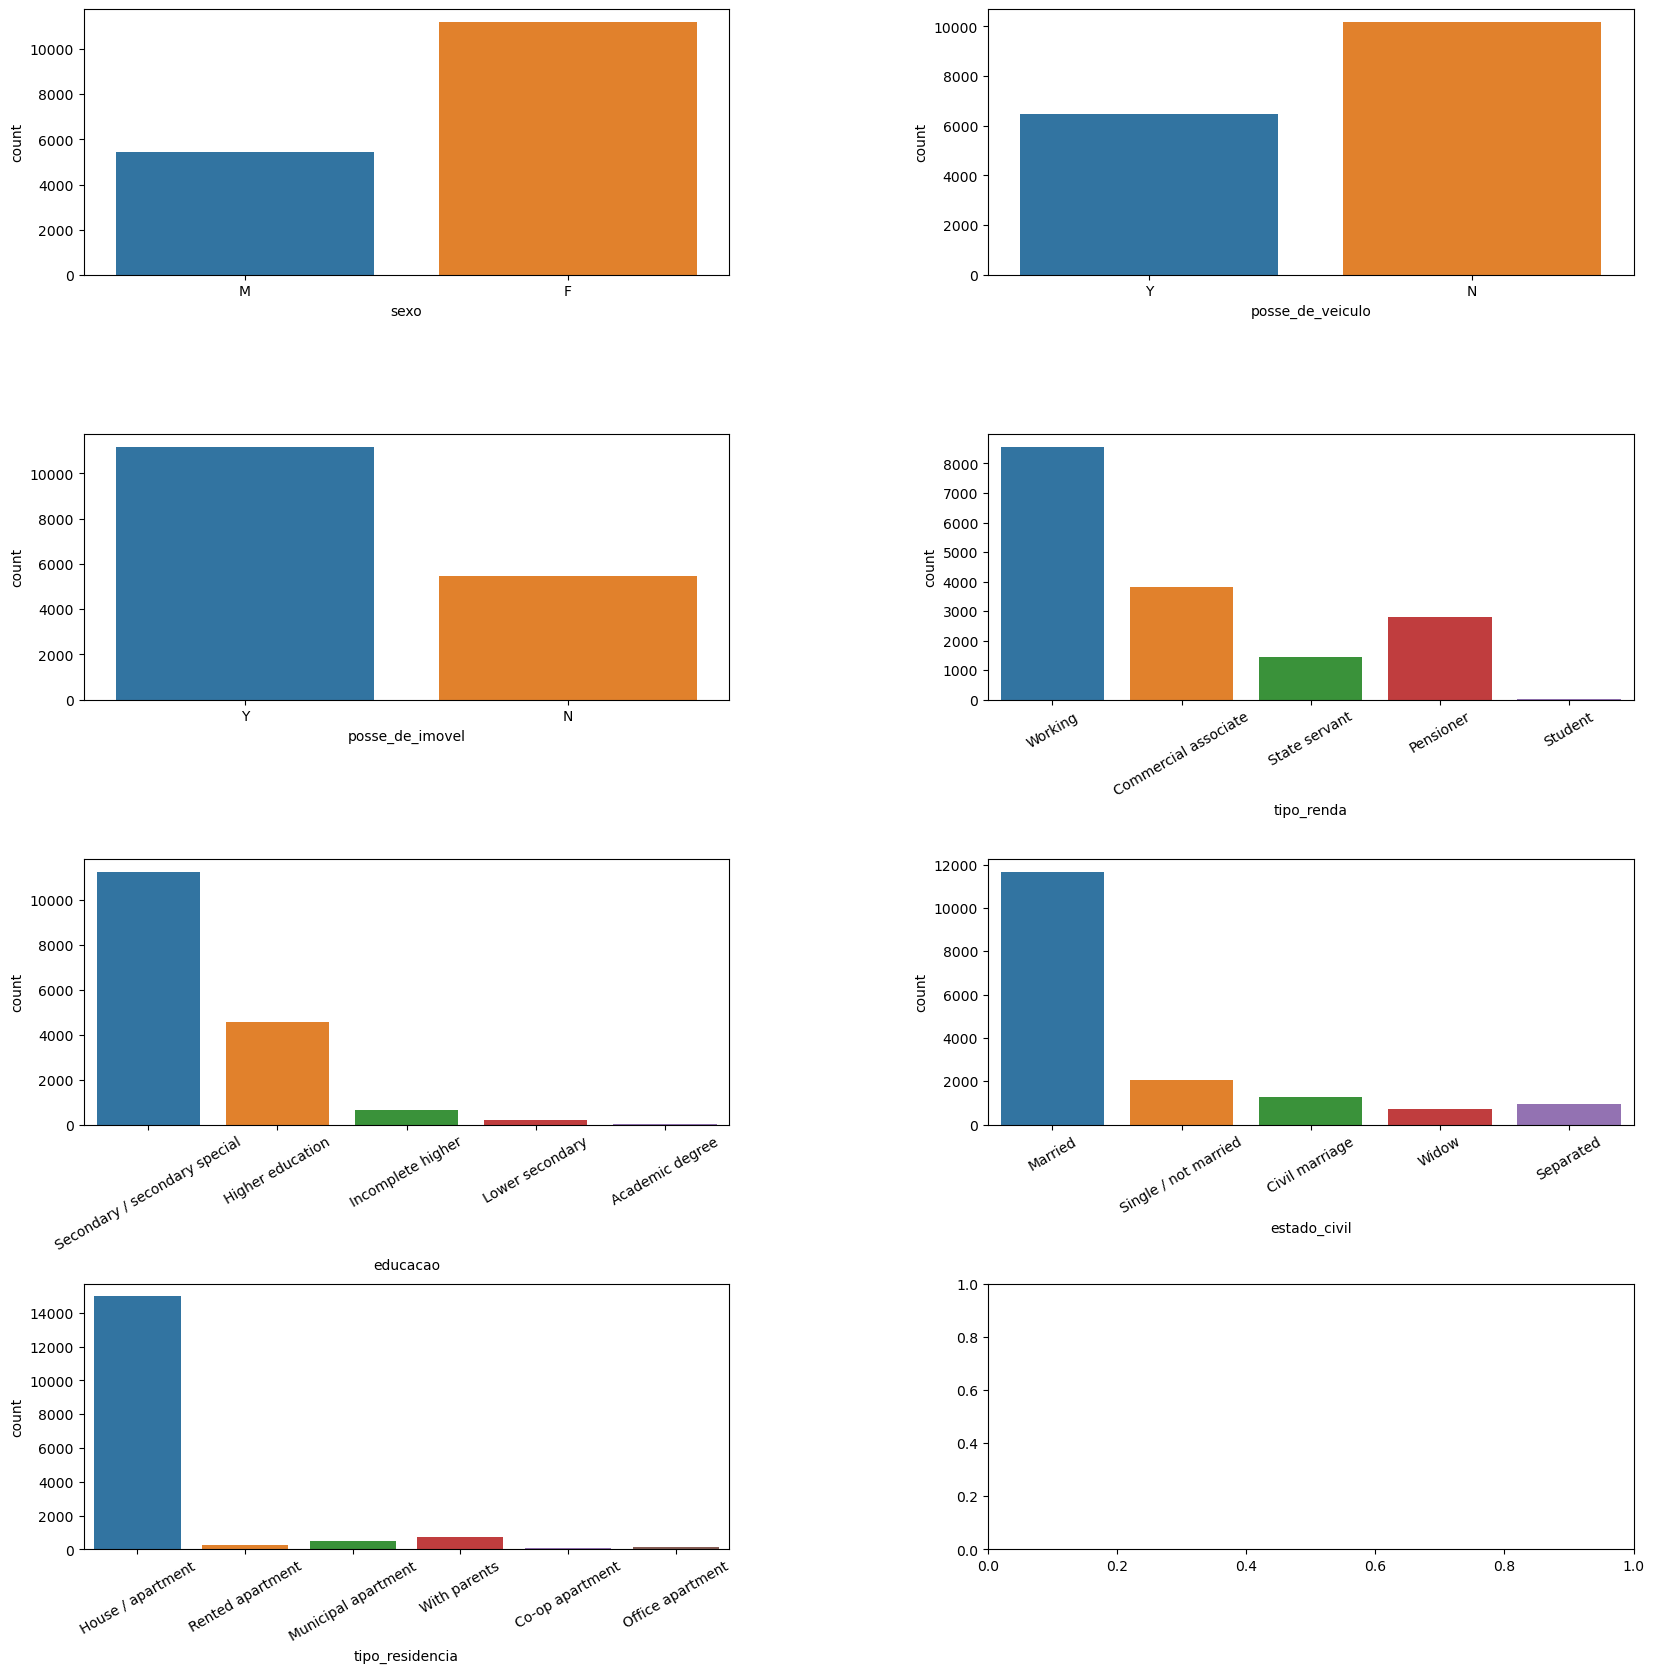

In [44]:
plt.close('all')
plt.rc('figure', figsize=(20, 20))
fig, axes = plt.subplots(4, 2)

sns.countplot(ax= axes[0, 0], x='sexo', data=df)
sns.countplot(ax= axes[0, 1], x='posse_de_veiculo', data=df)
sns.countplot(ax= axes[1, 0], x='posse_de_imovel', data=df)
tipo_renda = sns.countplot(ax= axes[1, 1], x='tipo_renda', data=df)
educacao = sns.countplot(ax= axes[2, 0], x='educacao', data=df)
estado_civil = sns.countplot(ax= axes[2, 1], x='estado_civil', data=df)
tipo_residencia = sns.countplot(ax= axes[3, 0], x='tipo_residencia', data=df)

plt.subplots_adjust(wspace=0.4, hspace=0.6)

tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=30)
educacao.set_xticklabels(educacao.get_xticklabels(), rotation=30)
estado_civil.set_xticklabels(estado_civil.get_xticklabels(), rotation=30)
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=30)

plt.show()

#### Bivariadas

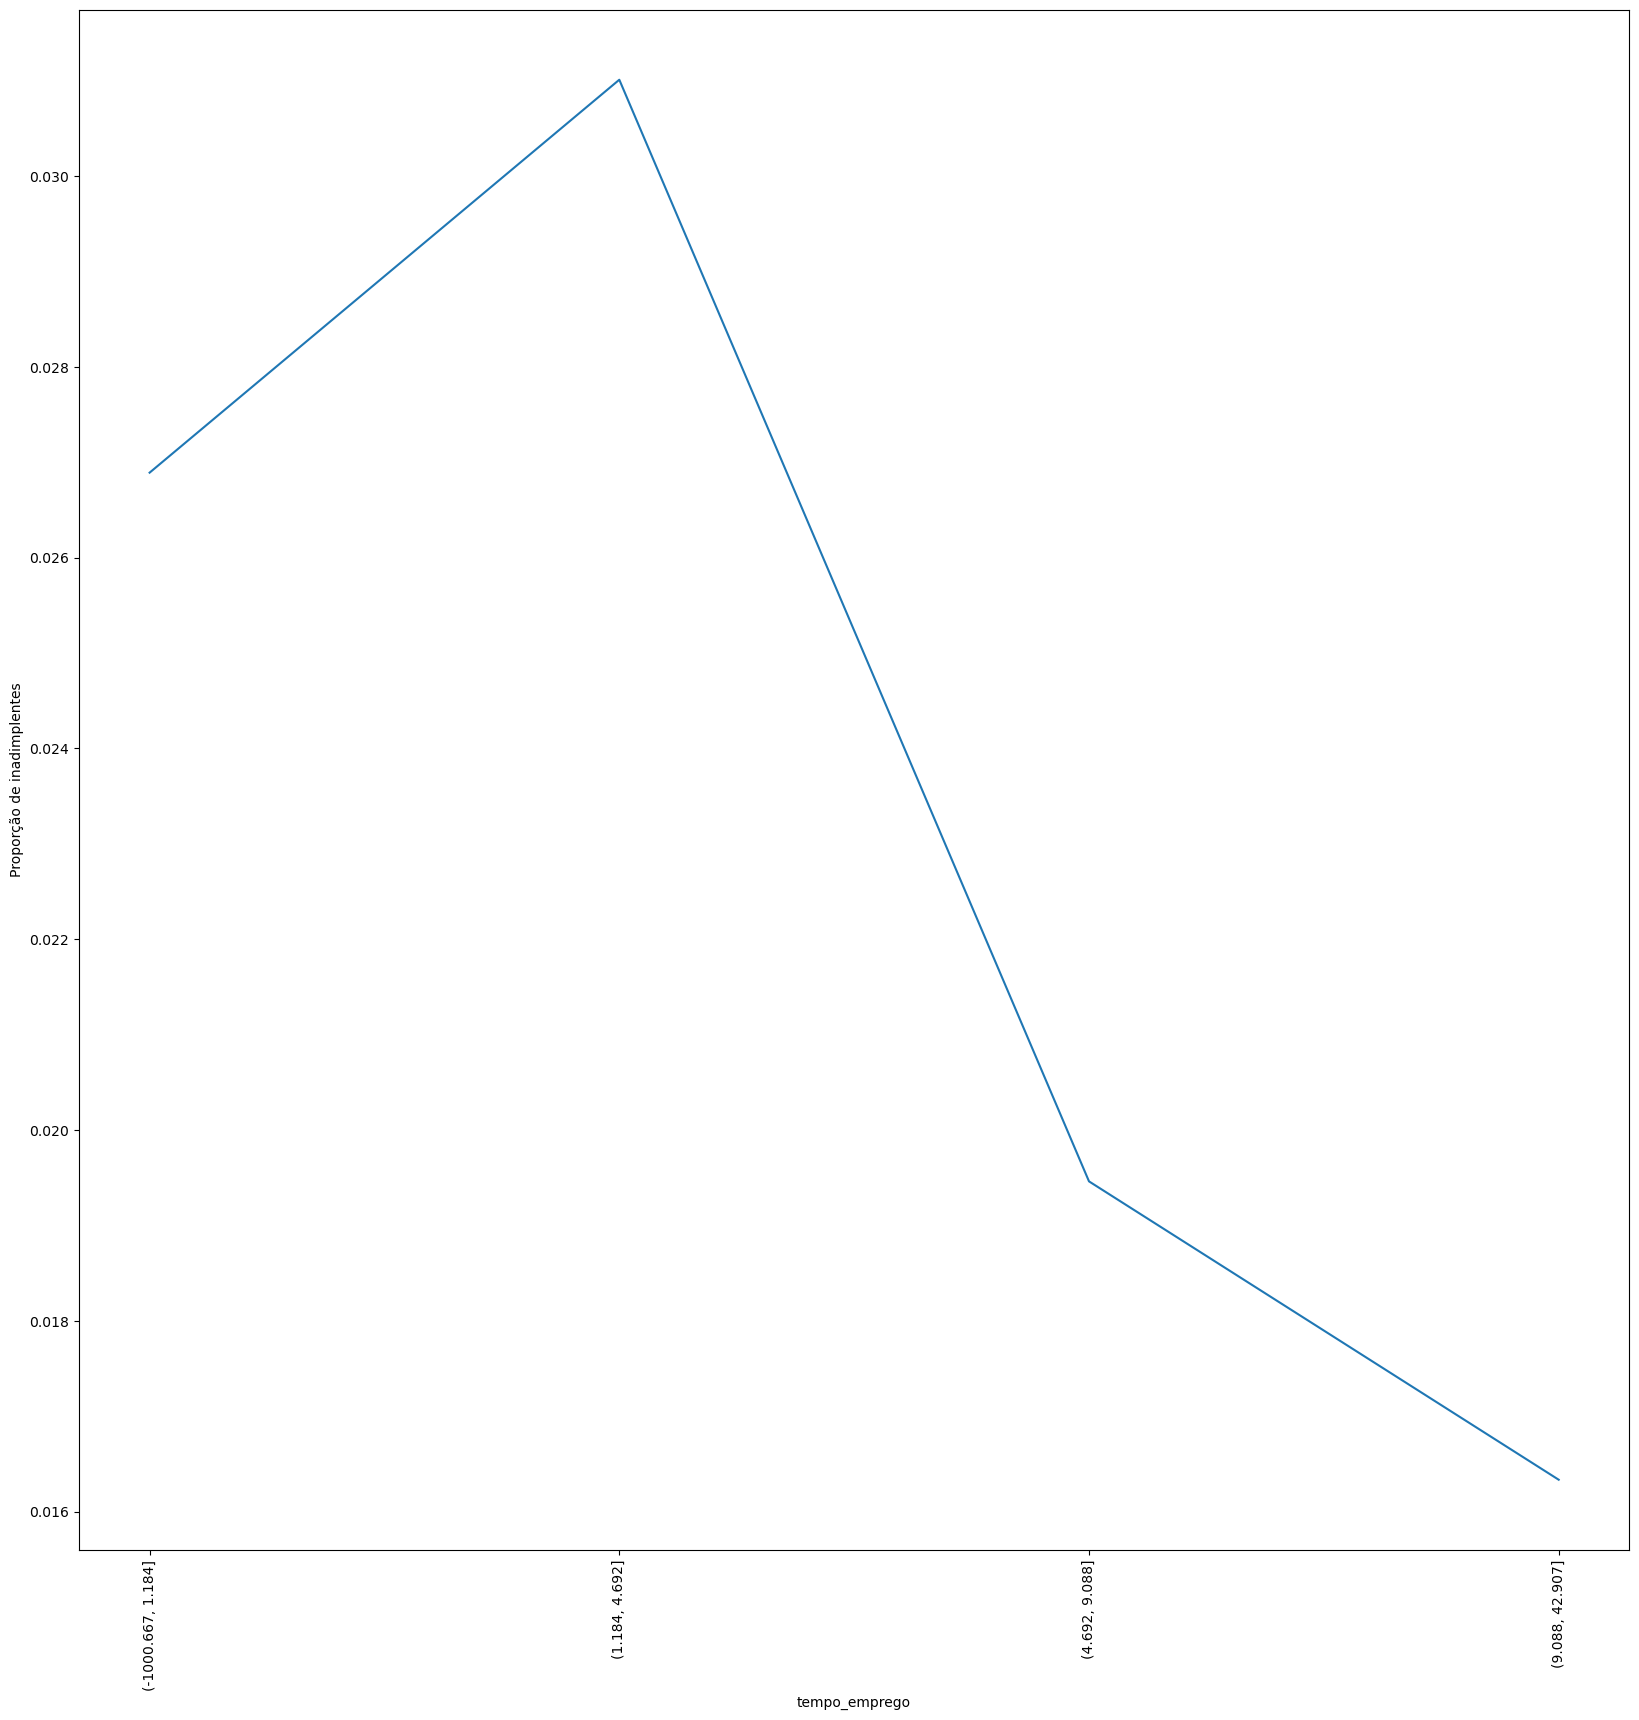

In [48]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

## Tratamento dos dados

Criação de dummies para variáveis do tipo "object", irei criar uma função para realizar.

para as colunas ['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'] irei realizar a criação dos dummies

In [63]:
def converter_em_dummy(dataf, colunas):
    dataf = pd.get_dummies(df, columns=colunas, drop_first=True)
    for i in dataf.columns:
        for coluna in colunas:
            if coluna in i:
                dataf[i] = dataf[i].astype(int)
    return dataf

In [66]:
df_encoded = df.copy()
colunas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
df_encoded = converter_em_dummy(df_encoded, colunas)

df_encoded.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,1,0,0,0,1,0,0,0,0


In [69]:
# convertendo a variável 'mau' em inteiro ao inves de bool
df_encoded['mau'] = df_encoded['mau'].astype(int)

## Criação do modelo de machine learning

O modelo escolhido será o Random Forest

Separação da base de dados em teste e treino

In [72]:
X = df_encoded.drop("mau",axis = 1)
y = df_encoded["mau"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### Criando o modelo

Definindo o n_estimators que iremos utilizar no modelo, iremos testar 2 n_estimators diferentes

In [73]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [74]:
# Testando acurácia do modelo com n_estimators=5
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.19%


### Matriz de Confusao

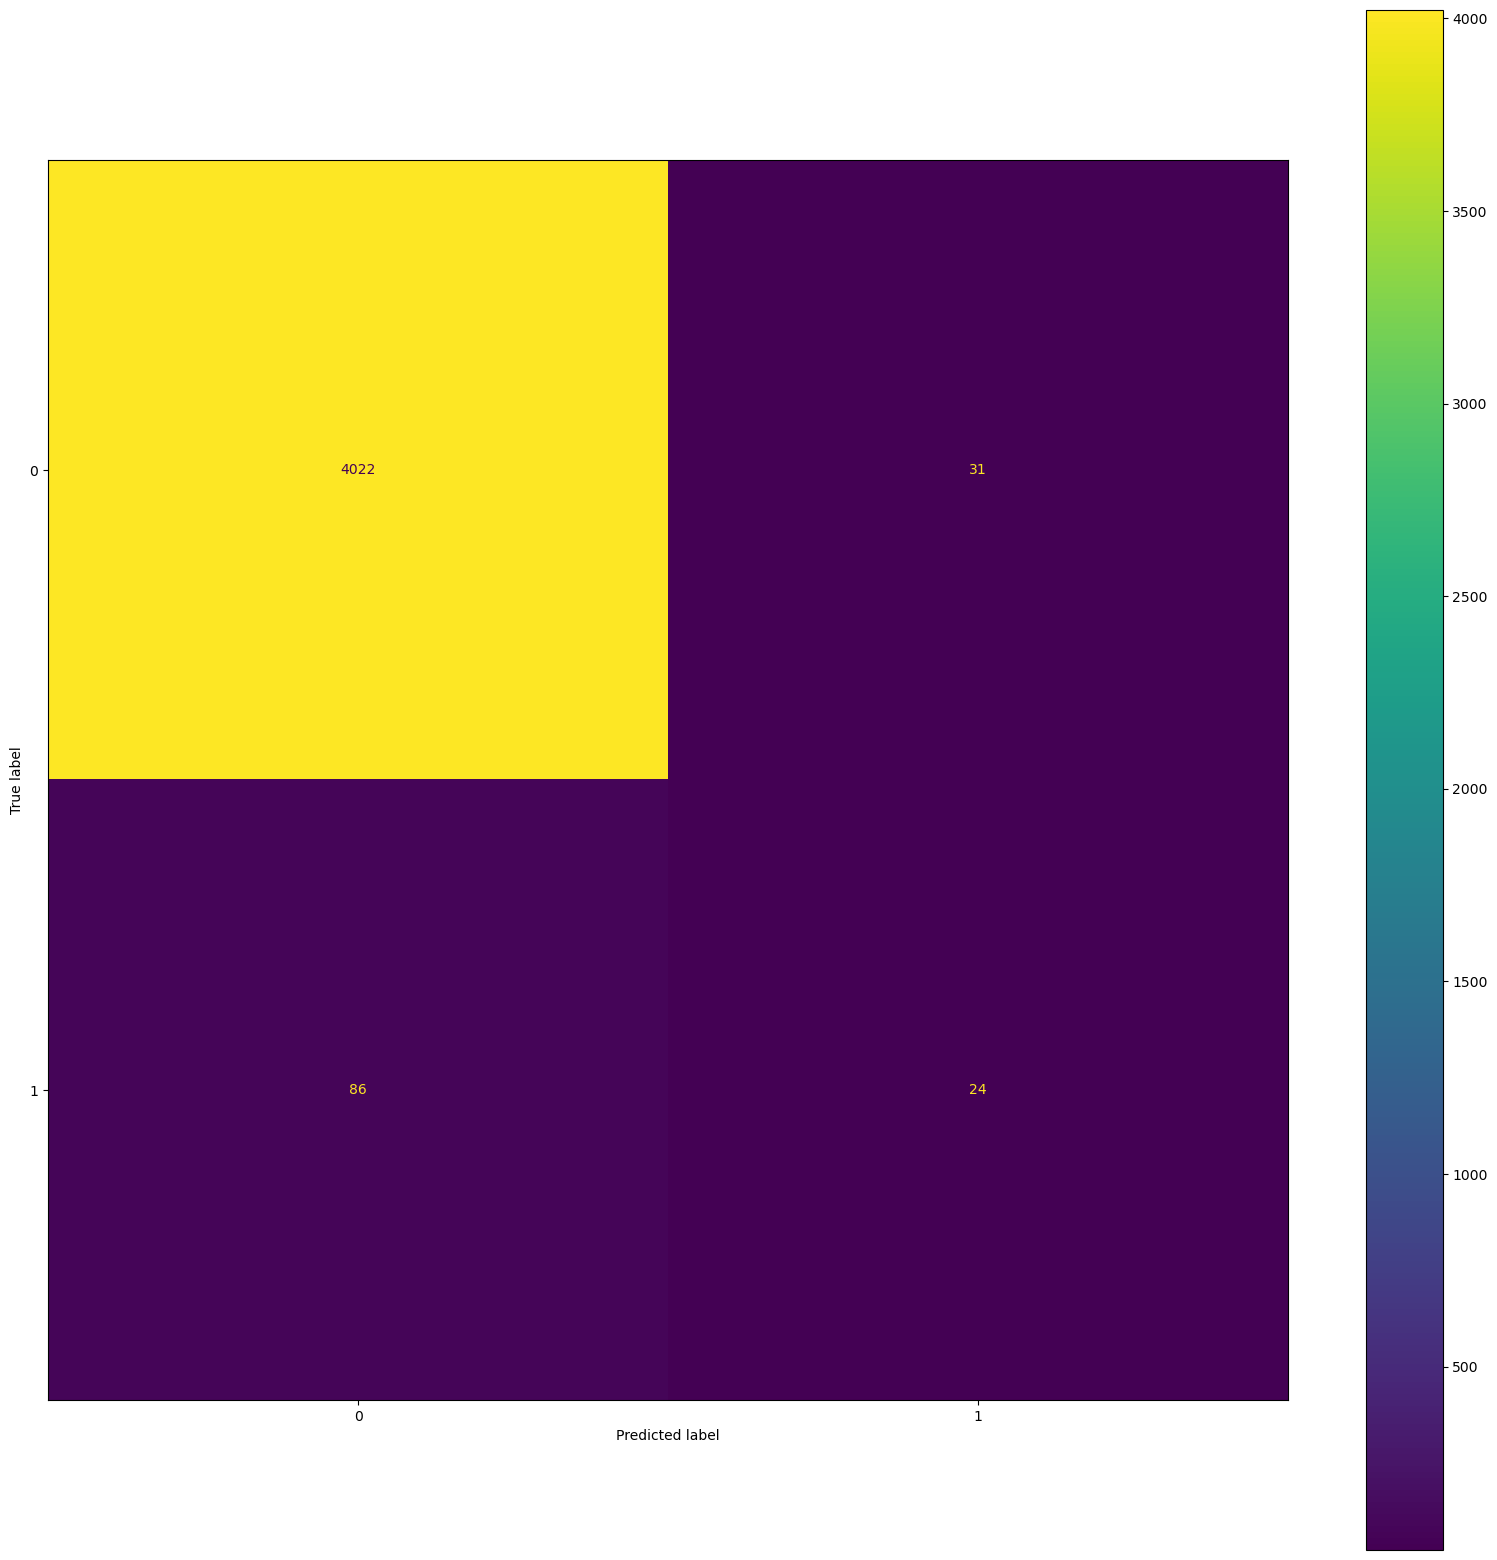

In [77]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()

#### Novo modelo com n_estimators = 10

In [78]:
clf_10 = RandomForestClassifier(n_estimators=10)
clf_10.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [79]:
y_pred_10 = clf_10.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_10)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.38%


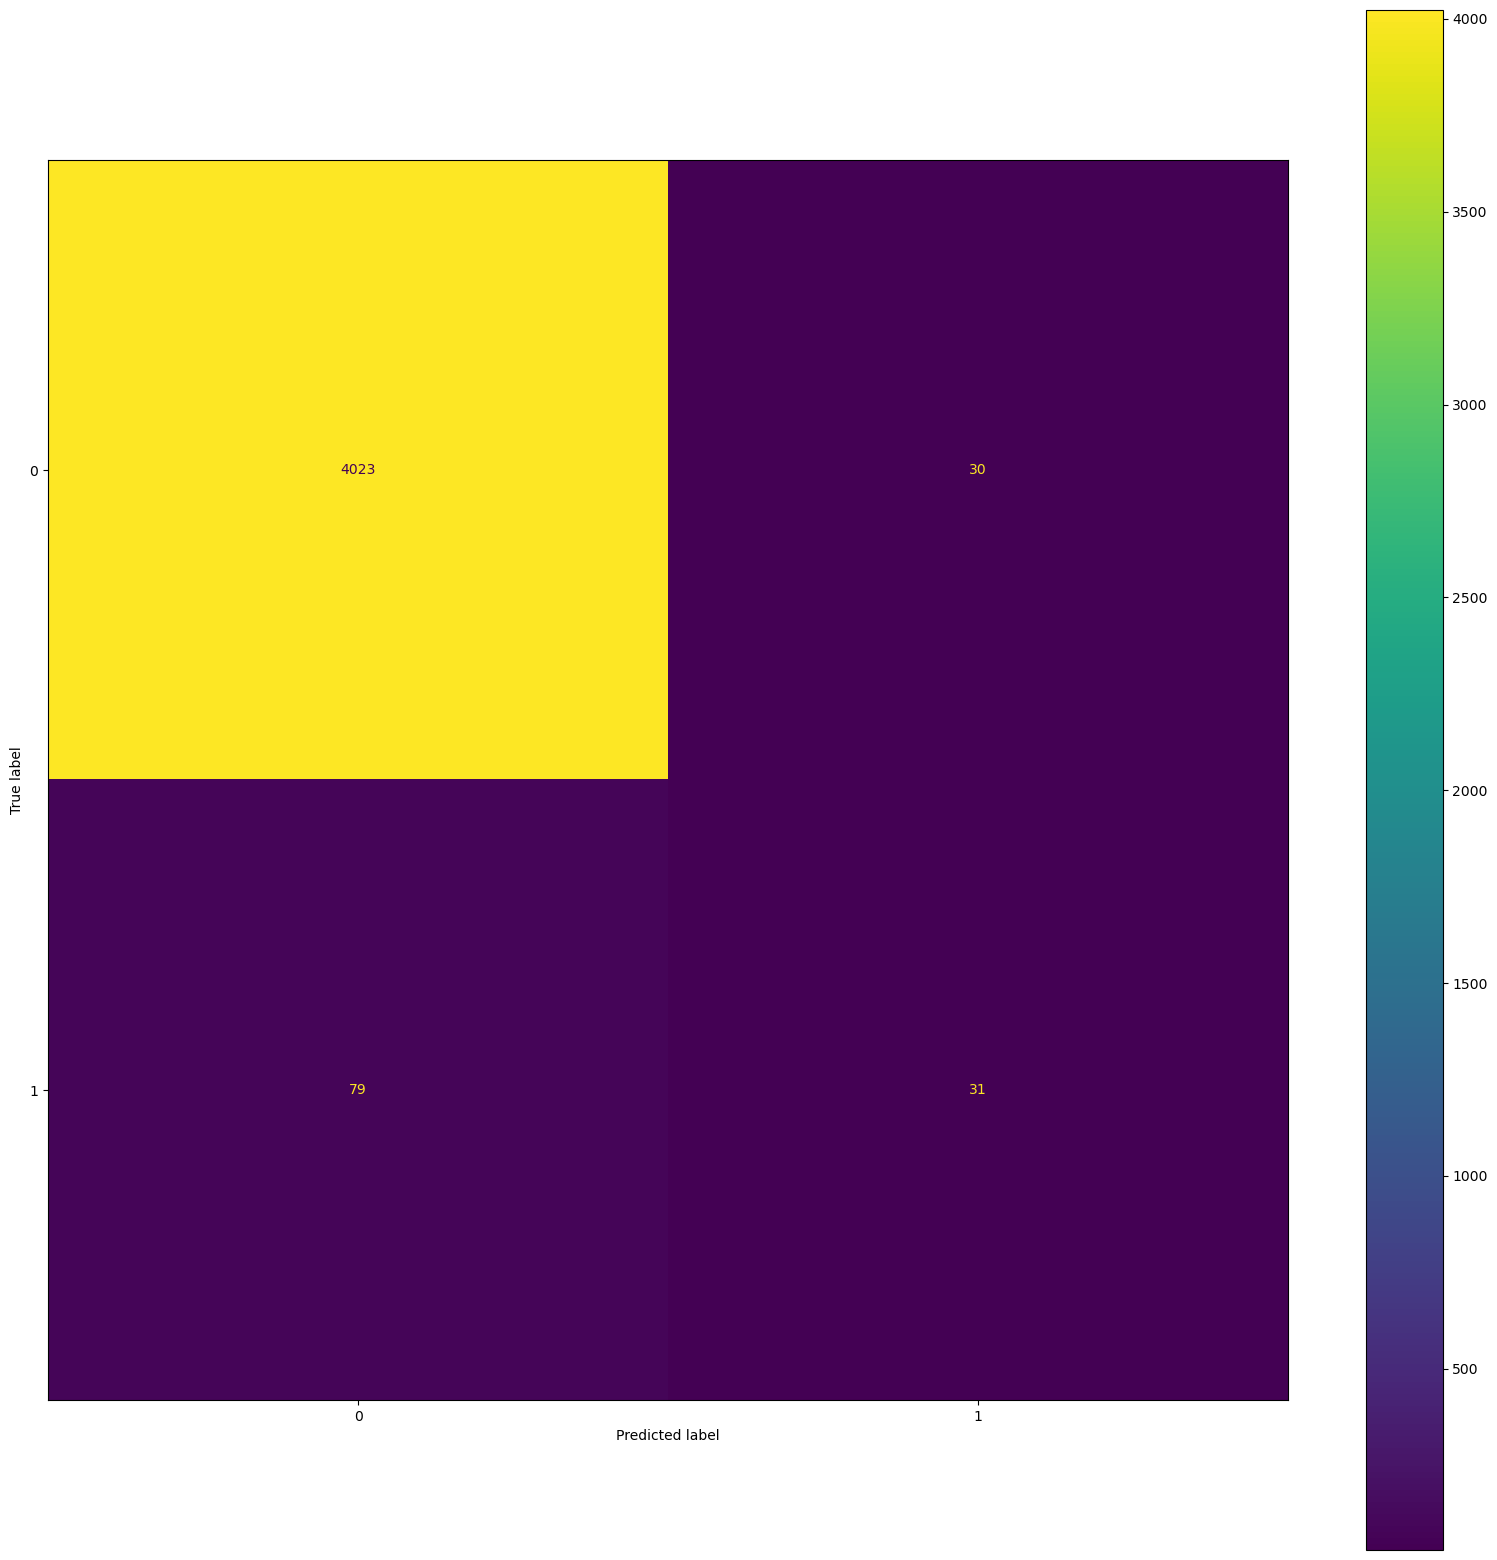

In [82]:
cm = confusion_matrix(y_test, y_pred_10, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()

## Avaliação dos resultados
Para avaliarmos em como nosso modelo auxilia em relação ao lucro da empresa de crédito iremos utilizar um exemplo apenas para ilustração.

Um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4023 x 5          | 30 x (-100)    | 17.115 |
| Reprovar  |  79 x 5           | 31 x (-100)    | -2.705 |

Estariamos evitando, portanto, um prejuízo de -2.705 '*dinheiros*'para a empresa - o que na prática significa um aumento no lucro.